In [7]:
import torch
from sklearn.decomposition import PCA
from PIL import Image
import numpy as np
import torchvision.transforms as transforms

# Specify the file path of the image
# image_path = "0000.jpg"
image_path = "dja.png"

# Load the image
Origin_image = Image.open(image_path)

image = torch.tensor(torch.from_numpy(np.array(Origin_image)))
image = torch.tensor(image, dtype=torch.float32)

print(torch.mean(image, dim=(0, 1)))
# normalized_image = (image - torch.mean(image, dim=(0, 1))) / torch.tensor(
#     [0.229, 0.224, 0.225]
# )
# image = (image - torch.mean(image, dim=(0, 1))) / torch.tensor([1, 1, 1 ])

# print(torch.mean(image, dim=(0, 1)))
# print(torch.mean(normalized_image, dim=(0, 1)))

eigval = torch.tensor([55.46, 4.794, 1.148]).reshape(1, 3)
eigvec = torch.tensor(
    [
        [-0.5675, 0.7192, 0.4009],
        [-0.5808, -0.0045, -0.8140],
        [-0.5836, -0.6948, 0.4203],
    ]
)
# print(torch.mul(eigval, torch.randn(size=[1,3])).T)
dja = torch.matmul(eigvec, torch.mul(eigval, torch.normal(mean=0.0, std=0.1, size=[1,3])).T).reshape(1, 1, 3)
print(torch.matmul(eigvec, torch.mul(eigval, torch.normal(mean=0.0, std=0.1, size=[1,3])).T).reshape(3,1,1))
pcaimage = image + torch.matmul(
    eigvec, torch.mul(eigval, torch.normal(mean=0.0, std=0.1, size=[1, 3])).T
).reshape(1, 1, 3)
print(torch.mean(pcaimage, dim=(0, 1)))
# print(torch.max(pcaimage))
# print(torch.min(pcaimage))

tensor([ 99.8383, 124.2366, 160.0901])
tensor([[[4.4679]],

        [[4.3686]],

        [[4.0820]]])
tensor([ 99.3466, 123.7608, 159.2532])


/tmp/ipykernel_799176/3965942212.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  image = torch.tensor(torch.from_numpy(np.array(Origin_image)))
/tmp/ipykernel_799176/3965942212.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  image = torch.tensor(image, dtype=torch.float32)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


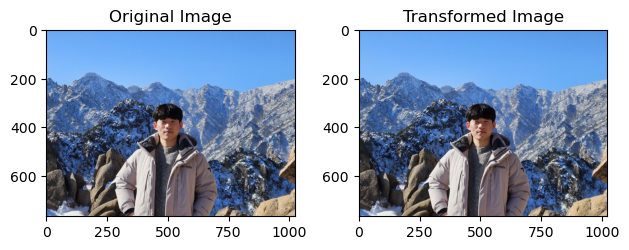

In [8]:
import matplotlib.pyplot as plt

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(Origin_image)
plt.title('Original Image')

# Display the transformed image
plt.subplot(1, 2, 2)
plt.imshow(pcaimage/255.0)
plt.title('Transformed Image')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()